In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [39]:
data.dropna(subset={'precio','ciudad','tipodepropiedad'},inplace=True)

In [19]:
data.precio.mean()

2530838.3458958333

In [44]:
data['sum'] = 1

In [34]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000000-10000000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000000-9000000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000000-8000000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000000-7000000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000000-6000000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000000-5000000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000000-4000000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000000-3000000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000000-2000000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000000'

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239600 entries, 0 to 239999
Data columns (total 25 columns):
id                            239600 non-null int32
titulo                        234218 non-null object
descripcion                   238025 non-null object
tipodepropiedad               239600 non-null object
direccion                     186785 non-null object
ciudad                        239600 non-null object
provincia                     239600 non-null object
antiguedad                    196272 non-null float32
habitaciones                  217185 non-null float32
garages                       201991 non-null float32
banos                         213510 non-null float64
metroscubiertos               222259 non-null float64
metrostotales                 188239 non-null float64
idzona                        211375 non-null float32
lat                           116341 non-null float32
lng                           116341 non-null float32
fecha                         239

In [55]:
precio_vs_tipo = data.groupby(['rango_precio','tipodepropiedad']).agg({'sum':'sum'}).unstack()

sum                                               \
tipodepropiedad  Apartamento Bodega comercial     Casa Casa en condominio   
rango_precio                                                                
+10000000              980.0             13.0   1120.0              290.0   
-1000000             13809.0            217.0  39615.0             3949.0   
1000000-2000000      15396.0            474.0  38900.0             4848.0   
2000000-3000000       9252.0            305.0  24836.0             3767.0   
3000000-4000000       6244.0            153.0  15856.0             2327.0   
4000000-5000000       4108.0             96.0   8670.0             1355.0   
5000000-6000000       2829.0             59.0   5057.0              965.0   
6000000-7000000       1894.0             42.0   3342.0              774.0   
7000000-8000000       1261.0             24.0   1992.0              513.0   
8000000-9000000        911.0             10.0   1317.0              324.0   
9000000-10000000       580.0             11.0    774.0              172.0   

                                                                            \
tipodepropiedad  Casa uso de suelo Departamento Compartido Duplex Edificio   
rango_precio                                                                 
+10000000                     13.0                     4.0    2.0    102.0   
-1000000                      69.0                    38.0  220.0     34.0   
1000000-2000000              153.0                    39.0   71.0    164.0   
2000000-3000000              130.0                    23.0   15.0    237.0   
3000000-4000000              109.0                    16.0   22.0    223.0   
4000000-5000000               82.0                     7.0    3.0    178.0   
5000000-6000000               37.0                     7.0    4.0    134.0   
6000000-7000000               39.0                     3.0    5.0    119.0   
7000000-8000000               34.0                     3.0    1.0     83.0   
8000000-9000000               26.0                     NaN    NaN     74.0   
9000000-10000000              14.0                     1.0    NaN     48.0   

                                   ...                                         \
tipodepropiedad  Garage Hospedaje  ... Lote Nave industrial Oficina comercial   
rango_precio                       ...                                          
+10000000           NaN       NaN  ...  NaN             3.0              26.0   
-1000000            1.0       NaN  ...  4.0             4.0             250.0   
1000000-2000000     NaN       NaN  ...  NaN            23.0             464.0   
2000000-3000000     NaN       1.0  ...  1.0            11.0             334.0   
3000000-4000000     NaN       NaN  ...  NaN            13.0             220.0   
4000000-5000000     NaN       NaN  ...  NaN             6.0             159.0   
5000000-6000000     NaN       NaN  ...  NaN             6.0             116.0   
6000000-7000000     NaN       NaN  ...  NaN             6.0              61.0   
7000000-8000000     NaN       NaN  ...  NaN             1.0              48.0   
8000000-9000000     NaN       NaN  ...  NaN             2.0              33.0   
9000000-10000000    NaN       NaN  ...  NaN             1.0              28.0   

                                                                           \
tipodepropiedad  Otros Quinta Vacacional Rancho Terreno Terreno comercial   
rango_precio                                                                
+10000000          3.0               4.0   12.0   101.0              35.0   
-1000000          33.0              50.0   27.0  4710.0             425.0   
1000000-2000000   37.0             107.0   33.0  2689.0             377.0   
2000000-3000000   18.0              81.0   33.0  1016.0             181.0   
3000000-4000000   13.0              49.0   17.0   525.0             104.0   
4000000-5000000    8.0              38.0   11.0   291.0              62.0   
5000000-6000000    9.0   

In [62]:
new_idx = ['-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
precio_vs_tipo = precio_vs_tipo.reindex(new_idx)
precio_vs_tipo = precio_vs_tipo.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de precio')

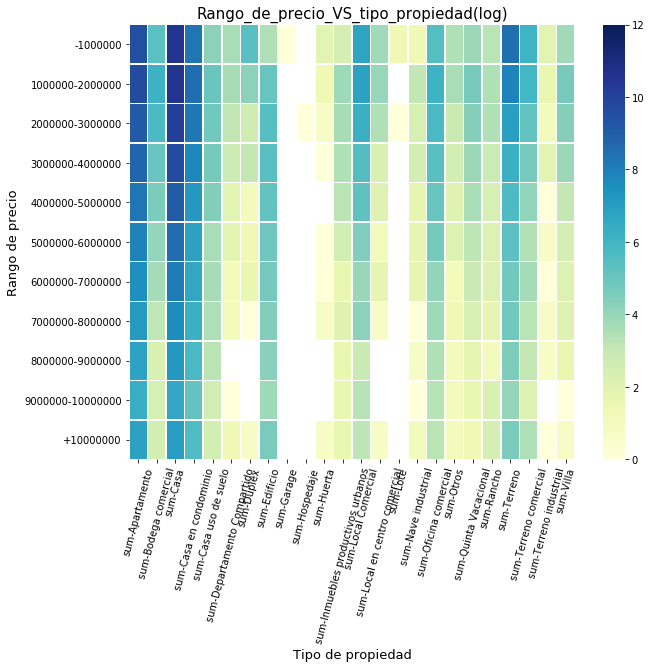

In [66]:
plt.figure(figsize=(10,8))
g = sns.heatmap(precio_vs_tipo, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Rango_de_precio_VS_tipo_propiedad(log)", fontsize=15)
g.set_xlabel("Tipo de propiedad", fontsize=13)
g.set_ylabel("Rango de precio", fontsize=13)

In [83]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]

In [84]:
precio_vs_ciudad = data_ciudad.groupby(['rango_precio','ciudad']).agg({'sum':'sum'}).unstack()

In [87]:
new_idx = ['-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
precio_vs_ciudad = precio_vs_ciudad.reindex(new_idx)
precio_vs_ciudad = precio_vs_ciudad.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de precio')

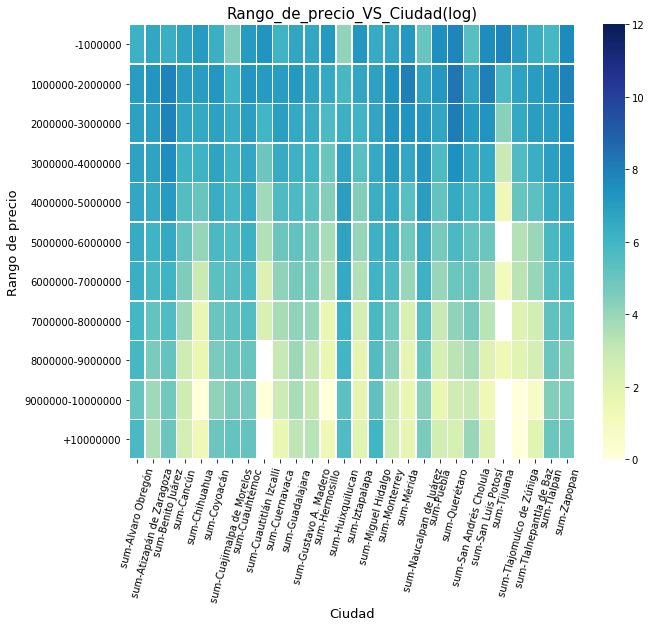

In [88]:
plt.figure(figsize=(10,8))
g = sns.heatmap(precio_vs_ciudad, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Rango_de_precio_VS_Ciudad(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de precio", fontsize=13)